In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

데이터 로딩 및 전처리

In [2]:
digits = datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))  # (n_samples, 64)
y = digits.target

Tensor로 변환

In [3]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

학습/테스트 분할

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DNN 모델 정의

In [5]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DigitClassifier().to(device)

손실 함수 및 옵티마이저

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

학습 루프

In [7]:
X_train = X_train.to(device)
y_train = y_train.to(device)

epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 2.4871
Epoch 2/20, Loss: 2.2844
Epoch 3/20, Loss: 2.1333
Epoch 4/20, Loss: 2.0107
Epoch 5/20, Loss: 1.9040
Epoch 6/20, Loss: 1.8054
Epoch 7/20, Loss: 1.7108
Epoch 8/20, Loss: 1.6174
Epoch 9/20, Loss: 1.5231
Epoch 10/20, Loss: 1.4272
Epoch 11/20, Loss: 1.3304
Epoch 12/20, Loss: 1.2337
Epoch 13/20, Loss: 1.1385
Epoch 14/20, Loss: 1.0457
Epoch 15/20, Loss: 0.9570
Epoch 16/20, Loss: 0.8729
Epoch 17/20, Loss: 0.7945
Epoch 18/20, Loss: 0.7227
Epoch 19/20, Loss: 0.6577
Epoch 20/20, Loss: 0.5984


평가

In [8]:
model.eval()
X_test = X_test.to(device)
y_test = y_test.to(device)
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_labels = torch.argmax(y_pred, dim=1)
    accuracy = (y_pred_labels == y_test).sum().item() / len(y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9139


시각화 및 예측 확인

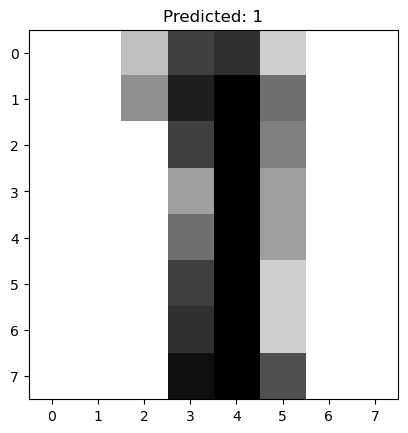

In [9]:
index = 10
plt.imshow(X_test[index].cpu().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Predicted: {y_pred_labels[index].item()}")
plt.show()